# 📌 QUESTION 1: DATA UNDERSTANDING
## 1.1 Describe the Dataset and Its Features

This dataset contains historical football match results from Somali Football Federation.  
### **Features:**
- `date`: The match date.
- `home`: The home team.
- `score`: The match result in format `home_goals : away_goals`.
- `away`: The away team.
  
### **Target Variable:**
- `score`: The final match score.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_name = "sff_somaliFootball_historical_data.csv"  
df = pd.read_csv(file_name)

# Display dataset structure
print("\n🔹 Dataset Overview:")
print(df.info())

# Display first few rows
print("\n🔹 First 5 Rows:")
print(df.head())



🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    885 non-null    object
 1   home    885 non-null    object
 2   score   885 non-null    object
 3   away    885 non-null    object
dtypes: object(4)
memory usage: 27.8+ KB
None

🔹 First 5 Rows:
          date                   home    score           away
0  04/06/2012               Elman FC    3 : 1    Badbaado FC 
1  05/06/2012              Sahafi FC    1 : 1     Jeenyo  FC 
2  07/06/2012             Heegan S.C    1 : 1     Dekedda SC 
3  08/06/2012    Mogadishu City Club    1 : 1    Horseed S.C 
4  11/06/2012             Jeenyo  FC    1 : 1       Elman FC 


## 1.2 Explore Basic Statistics and Summary
This section provides:
- The number of matches in the dataset.
- The number of unique teams.
- Missing values in each column.
- Basic statistics of the dataset.


In [2]:
# Dataset shape
print("\n🔹 Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Count unique teams
print("\n🔹 Unique Teams:")
print(f"Home Teams: {df['home'].nunique()}, Away Teams: {df['away'].nunique()}")

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Basic Summary:")
print(df.describe(include="all"))

# Explore unique match scores
print("\n🔹 Unique Scores:")
print(df["score"].value_counts().head(10))



🔹 Dataset Shape:
Rows: 885, Columns: 4

🔹 Unique Teams:
Home Teams: 25, Away Teams: 25

🔹 Missing Values:
date     0
home     0
score    0
away     0
dtype: int64

🔹 Basic Summary:
               date           home    score        away
count           885            885      885         885
unique          839             25       50          25
top     27/03/2017    Horseed S.C    1 : 1    Elman FC 
freq              4             77      113          76

🔹 Unique Scores:
score
1 : 1     113
1 : 0      72
0 : 0      70
0 : 1      60
1 : 2      59
2 : 1      55
0 : 2      53
2 : 2      41
2 : 0      40
3 : 0      36
Name: count, dtype: int64


# 📌 QUESTION 2: DATA EXPLORATION
## 2.1 Visualize the Distribution of Key Features
We visualize the distribution of `home_score` and `away_score` using histograms.


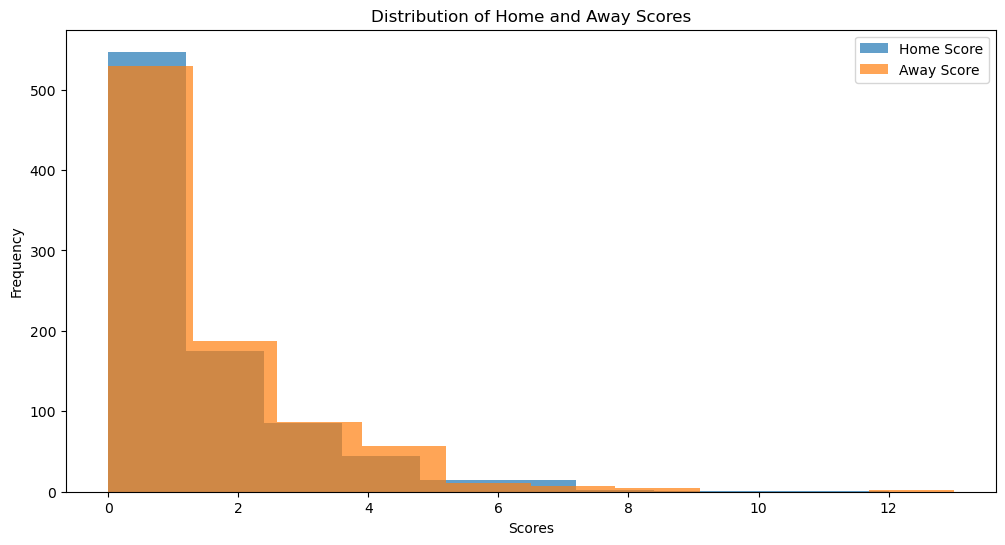

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Extract numeric scores
df['home_score'] = df['score'].str.extract(r'(\d+) : \d+').astype(float)
df['away_score'] = df['score'].str.extract(r'\d+ : (\d+)').astype(float)

# Plot score distribution
plt.figure(figsize=(12, 6))
plt.hist(df['home_score'], bins=10, alpha=0.7, label='Home Score')
plt.hist(df['away_score'], bins=10, alpha=0.7, label='Away Score')
plt.title("Distribution of Home and Away Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 2.2 Identify Correlations Between Features
A heatmap is used to visualize the correlation between home and away scores.


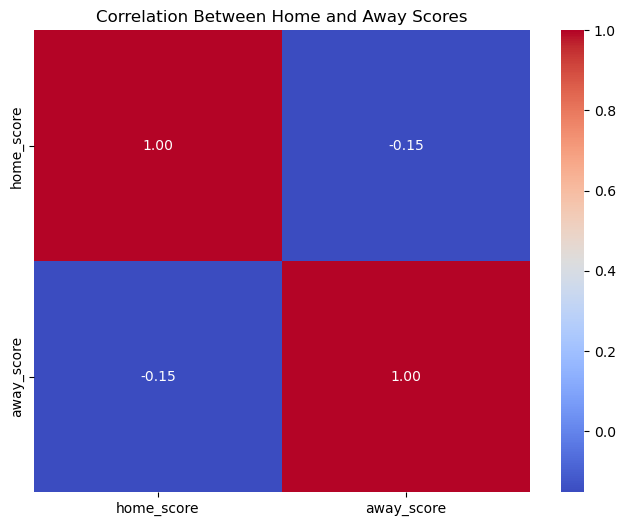

In [5]:
# Compute correlation
correlation = df[['home_score', 'away_score']].corr()

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Home and Away Scores")
plt.show()


# 📌 QUESTION 3: DATA PREPROCESSING
## 3.1 Handle Missing Values & 3.2 Remove Duplicates
We check for missing values and remove duplicate records.


In [6]:
# Handle missing values
missing_values = df.isnull().sum()

# Remove duplicate rows
duplicate_count = df.duplicated().sum()
df_cleaned = df.drop_duplicates().copy()

print("Data Preprocessing Summary:")
print(f"- Missing values per column:\n{missing_values}")
print(f"- Duplicate rows removed: {duplicate_count}")


Data Preprocessing Summary:
- Missing values per column:
date          0
home          0
score         0
away          0
home_score    0
away_score    0
dtype: int64
- Duplicate rows removed: 1


## 3.3 Handle Outliers in the `score` Column
We clean extra spaces in the `score` column.


In [7]:
df_cleaned.loc[:, 'score'] = df_cleaned['score'].str.strip()

# Save cleaned data
df_cleaned.to_csv("sff_somaliFootball_cleaned_data.csv", index=False)
print("Cleaned dataset saved as: sff_somaliFootball_cleaned_data.csv")


Cleaned dataset saved as: sff_somaliFootball_cleaned_data.csv


# 📌 QUESTION 4: MODEL TRAINING
## 4.1 Split Data & Train Model
The dataset is split into training and testing sets.  
A Logistic Regression model is trained.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pickle

# Encode categorical features
label_encoder_home = LabelEncoder()
label_encoder_away = LabelEncoder()
df['home_encoded'] = label_encoder_home.fit_transform(df['home'])
df['away_encoded'] = label_encoder_away.fit_transform(df['away'])

# Convert `score` into `Win`, `Loss`, `Draw`
def simplify_score(score):
    home_goals, away_goals = map(int, score.split(":"))
    return "Win" if home_goals > away_goals else "Loss" if home_goals < away_goals else "Draw"

df['match_result'] = df['score'].apply(simplify_score)

# Split dataset
X = df[['home_encoded', 'away_encoded']]
y = df['match_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_resampled, y_resampled)

# Save model
pickle.dump(model, open("trained_model.pkl", "wb"))
pickle.dump((X_test, y_test), open("test_data.pkl", "wb"))
print("\nModel Training Completed!")



Model Training Completed!


# 📌 QUESTION 5: MODEL EVALUATION
## 5.1 Evaluate Model & 5.2 Visualize Performance



Model Evaluation Summary:
- Accuracy: 0.3220
- Classification Report:
               precision    recall  f1-score   support

        Draw       0.26      0.20      0.23        46
        Loss       0.37      0.45      0.40        67
         Win       0.30      0.28      0.29        64

    accuracy                           0.32       177
   macro avg       0.31      0.31      0.31       177
weighted avg       0.31      0.32      0.32       177



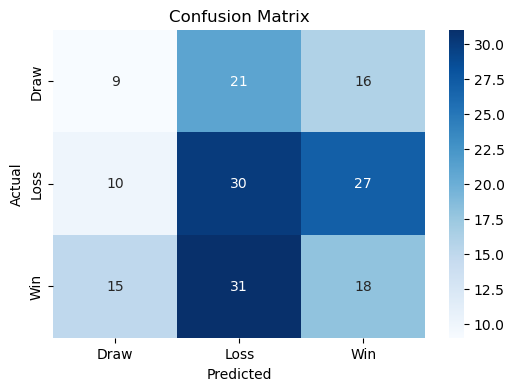

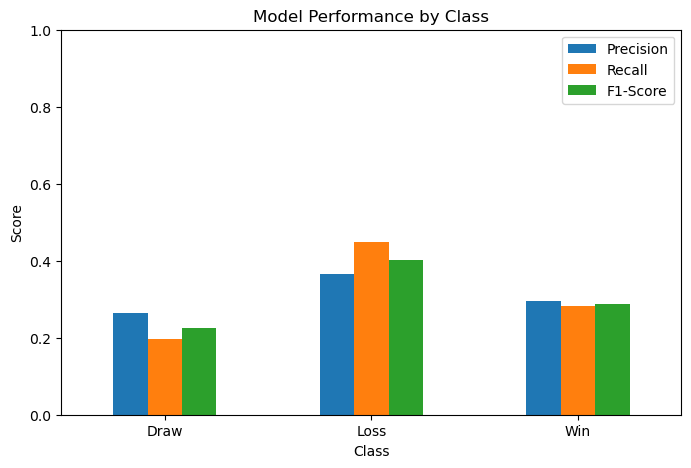


Evaluation Completed! Check the visualizations.


In [11]:
# 📌 QUESTION 5: MODEL EVALUATION
## 5.1 Evaluate Model & 5.2 Visualize Performance

# Import necessary libraries
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Load trained model and test data
model = pickle.load(open("trained_model.pkl", "rb"))
X_test, y_test = pickle.load(open("test_data.pkl", "rb"))

# Make predictions
y_pred = model.predict(X_test)

# 5.1: Use Appropriate Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  

print("\nModel Evaluation Summary:")
print(f"- Accuracy: {accuracy:.4f}")
print("- Classification Report:\n", report)

# 5.2: Provide Visualizations of Model Performance

# 1️⃣ **Confusion Matrix Plot**
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Draw", "Loss", "Win"], yticklabels=["Draw", "Loss", "Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ **Bar Plot of Class-wise F1-score**
labels = ["Draw", "Loss", "Win"]
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

# Create DataFrame for visualization
eval_df = pd.DataFrame({"Class": labels, "Precision": precision, "Recall": recall, "F1-Score": f1})
eval_df.set_index("Class", inplace=True)

# Plot F1-score for each class
eval_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

print("\nEvaluation Completed! Check the visualizations.")
